# 第六章 贷款按揭分析

## 概念和符号表示
FV为终值，PV为现值，T为时间，R为利率

## 货币时间价值

银行存款利率为5%，若想3年后获得10000元，现在需要存入多少钱？

### 单利终值和现值

In [1]:
import numpy as np
FV = 10000;T=3;r=0.05
PV  =10000/(1+0.05*3)
print ('现在应该往银行存入%.2f元' % PV)

现在应该往银行存入8695.65元


### 复利终值和现值
复利顾名思义，就是指在借贷过程中，不仅本金要计算利息，而且本金所产生的利息也要在 下期开始计算利息，也就是所谓的“利滚利” 。

In [2]:
FV = 10000;T=3;r=0.05
PV  =10000/(1+0.05)**3
print ('现在应该往银行存入%.2f元' % PV)
PV  =10000/(1+0.05/2)**6
print ('现在应该往银行存入%.2f元' % PV)

现在应该往银行存入8638.38元
现在应该往银行存入8622.97元


### 连续复利
连续复利是指，期数趋于无限大的情况下得到的利率，此时不同时期的间隔很短，例如，在借贷过程中 ，利息每个月支付一次或者每天支付一次，在这种情况下，就叫做连续复利

In [3]:
#年化利率为5%，按照每个月复利一次
PV  =10000* np.exp(-3*r)
print ('现在应该往银行存入%.2f元' % PV)

现在应该往银行存入8607.08元


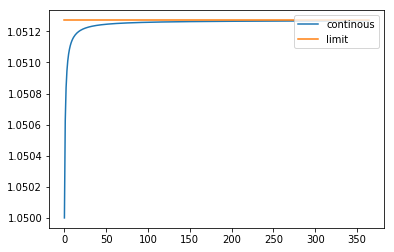

In [5]:
# 调整复利计息频数
# 计算实际每年收益率
R_continous =[]
R = 0.05
for i in range(1,366):
    r = (1+R/i)**i
    R_continous.append(r)
limit = np.ones(len(R_continous))* np.exp(R)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(R_continous,label='continous')
plt.plot(limit,label = 'limit' )
plt.legend(loc='upper right')
#plt.title('')
plt.show()

## 固定现金流计算

以国债为例，10年期面值为1000元的国债，票面利率为5%，并在第十年收到1000元本金，假设贴现 率为6%，贴现周期为10年，利息为50元，那么现值和终值计算公式为:

In [15]:
# 固定现金流计算PV
FaceValue = 1000
Payment =1000*0.05 # 债券收益(每期)
Rate = 0.06 #贴现率
final_payment = 1000 #到期还本,也可以理解为FV
Num = 10
Due = 0 #现金流计息方式(0为周期末付息，1为周期内付息)

In [16]:
Presentvalue = abs(np.pv(Rate,Num,Payment,final_payment,Due))
print ('当前现值为%.2f元' % Presentvalue)

当前现值为926.40元


In [17]:
# 固定现金流计算FV
FutureValue = abs(np.fv(Rate,Num,Payment,final_payment,Due))
print ('当前终值为%.2f元' % FutureValue)

当前终值为2449.89元


In [18]:
#用自己编写函数
def PV(face_value, payment, num,r):
    Pv_v = 0  # 初始值(是每期收益贴现后的现值
    for i in range(1,num+1):
        pv = 50/(1+r)**i
        Pv_v  = Pv_v + pv
    face_value_p = face_value/(1+r)**num #最后一次现金流贴现
    return Pv_v + face_value_p

Presentvalue = PV(1000, 50, 10,0.06)
print ('当前现值为%.2f元' % Presentvalue)

当前现值为926.40元


In [19]:
#用自己编写函数
def FV(face_value, payment, num,r):
    Fv_v = 0
    for i in np.arange(0, 10):
        fv = 50*(1+r)**i
        Fv_v  = Fv_v + fv
    face_value_f = face_value*(1+r)**num
    return Fv_v + face_value_f

Future_value = FV(1000, 50, 10,0.06)
print ('终值为%.2f元' % Future_value )

终值为2449.89元


## 变化现金流计算

在实际项目投资中，每期产生的现金流可能是变化的，比如投资买了一台设备，该设备带来的现 金流是变化的，这个时候也需要测算投资时候合适，通常测算投资是否合适，往往有两种方法比 较适合。

### NPV
投资项目投入使用后的净现金流量，按资本成本或企业要求达到的报酬率折算为现值，减去初始 投资以后的余额，叫净现值(net present value,NPV)

In [20]:
# NPV
import scipy as sp
cashflows=[-10000,3000,3500,7000,8000,2000]
sp.npv(0.112,cashflows)
if sp.npv(0.112,cashflows) > 0:
    print ('投资可以接受')
else:
    print('投资不可行')

投资可以接受


### IRR
内部收益率(IRR),就是资金流入现值总额与资金流出现值总额相等时，即净现值等于0时的折现率 ，可以理解为一项项目渴望达到的报酬率，一般情况下，内部收益率大于必要收益率时，该项目 可行，否则，不可行。

$$-Invest + \sum_{i=0}^n \frac {CF_i}{(1+Rate)^i} = 0$$
求解Rate  
这个Rate就是使得净现值等于0时的内部收益率，该指标越大越好

In [21]:
# IRR
# 计算IRR
cashflows = [-6000,2500,1500,3000,1000,2000]
IRR = np.irr(cashflows)
print('内部收益率为: %.4f%%' % (100*IRR))

内部收益率为: 21.1762%


In [22]:
#使用函数
def IRR_rate(initial_invest,cash_flow,R):
    cash_total = 0
    for i in range(0,len(cash_flow)):
        cash_in = cash_flow[i]/(1+R)**(i+1)
        cash_total = cash_total +cash_in
    npv = initial_invest + cash_total
    return npv
# 用数值方法求解
from scipy.optimize import fsolve
initial_invest = -6000
cash_flow = [2500,1500,3000,1000,2000]

irr = fsolve(lambda R: IRR_rate(initial_invest,cash_flow,R),0.08)
print('内部收益率为: %.4f%%' % (100*irr))

内部收益率为: 21.1762%


## 年金现金流计算
是在定期或者不定期的时间内一系列的现金流入或者流出，年金终值包括各年存入的本金相加以 及各年存入的本金所产生的利息，以按揭贷款为例

* 例如，投资者贷款50万元买房，还款期限10年，每月还款3000，贷款利率为多少 

In [23]:
#计算年化利率
Num =240
payment =-3000
PV =500000
FV =0
due = 0 #期末还款
Rate = np.rate(Num,payment,PV,FV,due)
print('年化利率为: %.4f%%' % (100*Rate*12))

年化利率为: 3.8862%


* 例如，投资者贷款50万元买房，利率不变，每月还款4000，还款期限为多少

In [24]:
#计算周期
rate = 0.038862/12
payment =-4000
PV =500000
FV =0
Periods = np.nper(rate,payment,PV,FV,when='end')
print('周期为:%s' % Periods )

周期为:160.48125328325278


## 按揭贷款分析
在商业按揭贷款中，通常有两种方式比较常见 
* 等额还款
* 等额本金还款

### 等额还款
假设贷款本金50万元，10年共还款120期，年贷款利率为5%，若每月还款5000元，则贷款余额为 多少

In [25]:
# 等额还款
def Ajfixpayment(MP,Num,B,rate):
    # MP 月还款额
    # Num 期数
    # B 贷款本金
    # rate 贷款利率
    # 初始化相关变量
    # 初始化行向量，用来存储每次循环的值
    IR = [0] * Num # 月利息
    YE = [0] * Num  # 贷款余额
    BJ = [0] * Num  # 每月偿还本金
    # 第一个月初贷款余额等于本金
    YE[0] = B
    for i in range(Num):
        IR[i] = Rate * YE[i]
        BJ[i] = MP - IR[i]
        # 不是最后一次还款
        if i < Num - 1:
            YE[i+1] = YE[i] - BJ[i] #第i+1期本金等于第i期本金 - 第i期归还本金
    return B - sum(BJ) #剩余本金

#设置相关参数
Num =120
B = 500000
Rate = 0.05/12
MP = 5000
F = Ajfixpayment(MP,Num,B,Rate)
print ('贷款余额还剩下: %.2f' % F)

贷款余额还剩下: 47093.35


假设贷款本金50万元，10年共还款120期，年贷款利率为5%，10年后还清，每月应该还多少?

In [26]:
#找到MP(每月应该还款多少)
from scipy.optimize import fsolve
# 初始值5000
Mpo = 5000
MP = fsolve(lambda MP: Ajfixpayment(MP,Num,B,Rate), Mpo)
print ('每月贷款应还款为%.2f元' % MP)

#用公式
r =0.05/12
MP = 500000* (r*(1+r)**120)/ ((1+r)**120 -1 )
print ('每月贷款应还款为%.2f元' % MP)

每月贷款应还款为5303.28元
每月贷款应还款为5303.28元


### 等额本金还款
借款人每期偿还等额本金，同时付清每个月的贷款利息，所以每期归还的本金等于贷款总额除以 贷款期数
 假设 R为月贷款利率, B为贷款本金, MB为月还本金,n 为期限

In [1]:
# # # # # # 等额本金还款
def AJvarPayment(Num,B,Rate):
    MB = B/Num #每月本金
    # 初始化相关变量
    IR = [0]*Num #每月利息
    YE = [0]*Num #每月贷款余额
    MP = [0]*Num  #每月还款额
    YE[0] = B
    for i in range(0,Num):
        IR[i] = YE[i] * Rate
        MP[i] = MB + IR[i]
        if i < Num - 1:
            YE[i + 1] = YE[i] - MB
    return MP
# 设置参数
Rate = 0.05/12
Num =120
B =500000
MP = AJvarPayment(Num,B,Rate)
print ('每月贷款应还款为%s \n' % MP)

每月贷款应还款为[6250.0, 6232.638888888889, 6215.277777777777, 6197.916666666667, 6180.555555555556, 6163.194444444444, 6145.833333333333, 6128.472222222222, 6111.11111111111, 6093.75, 6076.388888888889, 6059.027777777777, 6041.666666666666, 6024.305555555555, 6006.944444444443, 5989.583333333332, 5972.222222222221, 5954.8611111111095, 5937.499999999999, 5920.138888888888, 5902.7777777777765, 5885.416666666665, 5868.055555555554, 5850.6944444444425, 5833.333333333332, 5815.972222222221, 5798.6111111111095, 5781.249999999998, 5763.888888888887, 5746.527777777776, 5729.166666666664, 5711.805555555553, 5694.444444444442, 5677.083333333331, 5659.72222222222, 5642.361111111109, 5624.999999999997, 5607.638888888886, 5590.277777777776, 5572.916666666664, 5555.555555555553, 5538.194444444442, 5520.83333333333, 5503.472222222219, 5486.111111111108, 5468.749999999996, 5451.388888888885, 5434.027777777774, 5416.666666666663, 5399.305555555552, 5381.944444444441, 5364.583333333329, 5347.222222222218, 5329

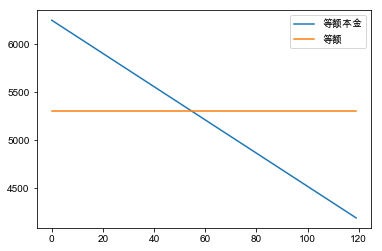

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
r= 0.05/12
MP_fix = np.ones(len(MP))*500000* (r*(1+r)**120)/ ((1+r)**120 -1 )
plt.plot(MP,label ='等额本金')
plt.plot(MP_fix,label='等额')
plt.legend(loc='upper right')
plt.show()

## hw06

### Q1

贷款100万元，如果20年还清，年贷款利率为6%，如果按照等额还款，每月需要还款多少，如果按照等额本金还款，绘制每月还款额度

通过做图画比较，两种还款方式，每月还款的本金，利息以及总还款额和剩余本金(绘制图形，展示两种方式下，每月的还款额，本金以及利息和剩余本金）

以及两种还款方式下，两种还款方式下总还款额的差值。

In [7]:
#用公式
r =0.06/12
MP1 = 1000000* (r*(1+r)**240)/ ((1+r)**240 -1 )
print ('每月贷款应还款为%.2f元' % MP1)

每月贷款应还款为7164.31元


In [8]:
# # # # # # 等额本金还款
def AJvarPayment(Num,B,Rate):
    MB = B/Num #每月本金
    # 初始化相关变量
    IR = [0]*Num #每月利息
    YE = [0]*Num #每月贷款余额
    MP = [0]*Num  #每月还款额
    YE[0] = B
    for i in range(0,Num):
        IR[i] = YE[i] * Rate
        MP[i] = MB + IR[i]
        if i < Num - 1:
            YE[i + 1] = YE[i] - MB
    return MP
# 设置参数
Rate = 0.06/12
Num =240
B =1000000
MP = AJvarPayment(Num,B,Rate)
print ('每月贷款应还款为%s \n' % MP)

每月贷款应还款为[9166.666666666668, 9145.833333333334, 9125.0, 9104.166666666668, 9083.333333333336, 9062.500000000002, 9041.666666666668, 9020.833333333336, 9000.000000000002, 8979.166666666668, 8958.333333333336, 8937.500000000004, 8916.66666666667, 8895.833333333336, 8875.000000000004, 8854.16666666667, 8833.333333333336, 8812.500000000004, 8791.666666666672, 8770.833333333338, 8750.000000000004, 8729.166666666672, 8708.333333333338, 8687.500000000004, 8666.666666666672, 8645.83333333334, 8625.000000000005, 8604.166666666672, 8583.33333333334, 8562.500000000007, 8541.666666666673, 8520.83333333334, 8500.000000000007, 8479.166666666673, 8458.33333333334, 8437.500000000007, 8416.666666666675, 8395.833333333341, 8375.000000000007, 8354.166666666675, 8333.333333333341, 8312.500000000007, 8291.666666666675, 8270.833333333343, 8250.00000000001, 8229.166666666675, 8208.333333333343, 8187.500000000009, 8166.666666666677, 8145.833333333343, 8125.00000000001, 8104.166666666677, 8083.333333333344, 806

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

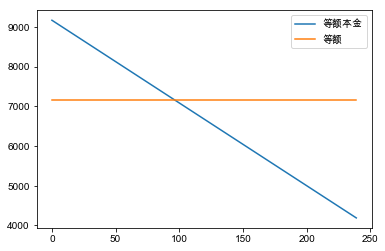

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
MP_fix = np.ones(len(MP))*MP1
plt.plot(MP,label ='等额本金')
plt.plot(MP_fix,label='等额')
plt.legend(loc='upper right')
plt.show()

# 第七章 Python随机模拟

In [11]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy as sp
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

## 随机数模拟

In [ ]:
# # # # # #产生一个随机数
npr.rand(100)
npr.rand(5,5)
# 产生5到10范围内的随机数
npr.rand(100)*5 + 5

### 模拟正态分布

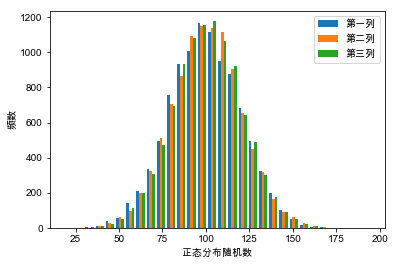

In [12]:
# # # # # # 
# 产生一个均值为100,标准差为20的正态分布
x = npr.normal(100,20,(10000,3))
plt.hist(x,bins=30)
plt.xlabel('正态分布随机数')
plt.ylabel('频数')
plt.legend(['第一列','第二列','第三列'],loc =1)
plt.show()

### 模拟二项分布

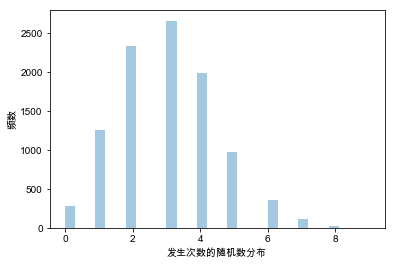

In [13]:
# 发生概率为0.3，相当于在10次实验中，时事件发生的次数
# npr.seed(100) #随机数种子一定时，产生的随机数相同
import seaborn as sns
# npr.seed(100)
x = npr.binomial(n=10,p=0.3,size=10000)
sns.distplot(x,bins=30,kde=False)
plt.xlabel('发生次数的随机数分布')
plt.ylabel('频数')
plt.show()

### 模拟指数分布

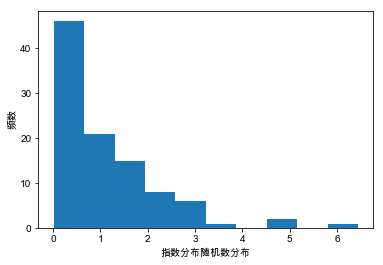

In [14]:
x = npr.exponential(scale=1,size=100)
plt.hist(x,bins=10)
plt.xlabel('指数分布随机数分布')
plt.ylabel('频数')
plt.show()

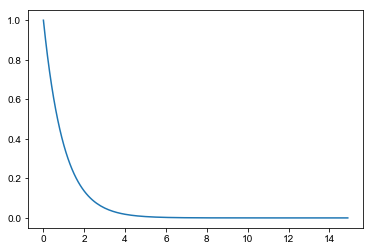

In [15]:
# 概率密度函数
lambd = 1
x = np.arange(0,15,0.1)
y = lambd*np.exp(-lambd*x)
plt.plot(x,y)
plt.show()

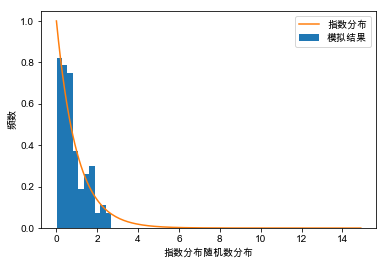

In [17]:
# 将密度函数和模拟结果画在一起
x = npr.exponential(scale=1,size=100)
lambd = 1
x1 = np.arange(0,15,0.1)
y1 = lambd*np.exp(-lambd*x1)
plt.hist(x,bins=10,label='模拟结果',density=True)
plt.plot(x1,y1,label ='指数分布')
plt.xlabel('指数分布随机数分布')
plt.ylabel('频数')
plt.legend(loc='upper right')
plt.show()

### 模拟泊松分布

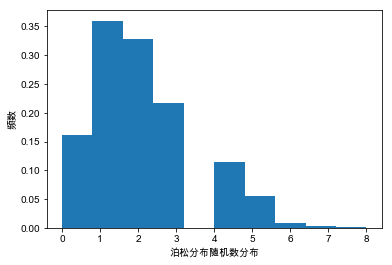

In [18]:
x = npr.poisson(lam=2,size=1000)
plt.hist(x,bins=10,density=True )
plt.xlabel('泊松分布随机数分布')
plt.ylabel('频数')
plt.show()

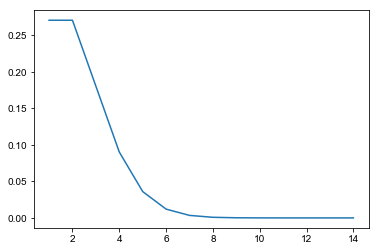

In [19]:
# 概率密度函数
import math
lambd = 2
x = np.arange(1,15,1)
y = []
for t in x:
    y.append((pow(lambd,t)/math.factorial(t))* np.exp(-lambd))
plt.plot(x,y)
plt.show()

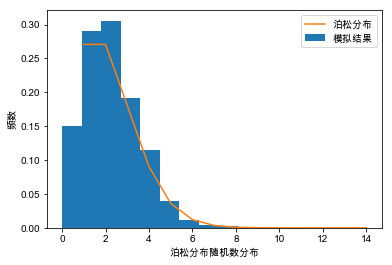

In [20]:
# 将密度函数和模拟结果画在一起
x_moni = npr.poisson(lam=2,size=1000)
lambd = 2
x = np.arange(1,15,1)
y = []
for t in x:
    y.append((pow(lambd, t) / math.factorial(t)) * np.exp(-lambd))
plt.hist(x_moni,bins=10,label='模拟结果',density=True)
plt.plot(x,y,label ='泊松分布')
plt.xlabel('泊松分布随机数分布')
plt.ylabel('频数')
plt.legend(loc='upper right')
plt.show()

## 蒙特卡洛模拟

In [21]:
# 测试点数
Testnum =10000000
# 落到圆内的点数
# 产生均值分布随机数，落在[-1,1]之间
import scipy as sp
sp.random.seed(123345)
x = sp.random.uniform(low=-1,high=1,size=Testnum)
y = sp.random.uniform(low=-1,high=1,size=Testnum)
# 找出x^2 + y^2 <=1
circle_num = 0
for i in range(0,Testnum):
    if (x[i]**2 + y[i]**2) <=1:
        circle_num += 1
print('pi的值等于%.10f' % (4*circle_num/Testnum))

pi的值等于3.1414880000


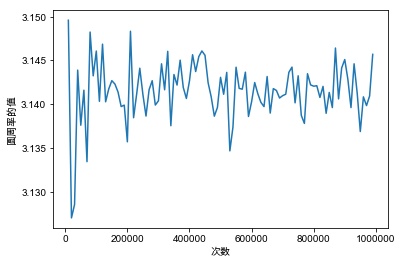

In [22]:
# # # 计算不同的模拟次数Pi的值
def calculate_pi(start_num,Testnum,steps):
    cal_pi =[]
    # 循环次数
    sim_num = np.arange(start_num,Testnum,steps)
    for num in sim_num:
        circle_num = 0
        x = sp.random.uniform(low=-1, high=1, size=num)
        y = sp.random.uniform(low=-1, high=1, size=num)
        for i in range(0,num):
            if (x[i] ** 2 + y[i] ** 2) <= 1:
                circle_num += 1
        cal_pi.append(4*circle_num/num)
    return cal_pi

sim_num = np.arange(10000, 1000000, 10000) # 模拟次数
cal_pi = calculate_pi(10000, 1000000, 10000) # Pi的值
plt.plot(sim_num,cal_pi)
plt.xlabel('次数')
plt.ylabel('圆周率的值')
plt.show()

## 价格序列

### 生成收益率服从正态分布的价格序列

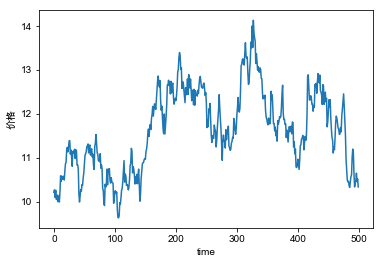

In [23]:
def RandnPrice(Price0,mu,sigma,N):
    # 生成随机收益率
    rate  = np.random.normal(mu,sigma,N)
    #使用累积函数
    Price = Price0 * np.cumprod(rate+1)
    return Price

# 定义初始值
Price0 = 10
mu = 1.1**(1/250) - 1 #假设收益率为10%
sigma = 0.3/np.sqrt(250) #标准差
N =250 *2

Price = RandnPrice(Price0,mu,sigma,N)
plt.plot(Price)
plt.xlabel('time')
plt.ylabel('价格')
plt.show()

### 模拟股票走势

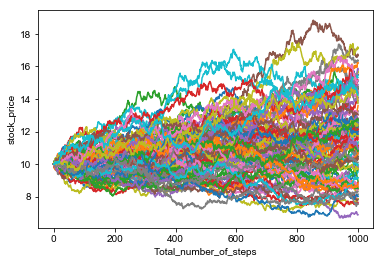

In [24]:
import pandas as pd
stock_price_today = 10
T = 1 # 时间为1年
n_steps =1000 #步长
mu =0.15
sigma =0.2
n_simulation = 100 #模拟次数
dt =T/n_steps # 时间间隔
# S = sp.zeros([n_steps],dtype=float)
stock_price_path = pd.DataFrame(columns = range(0,n_simulation,1))
S = sp.zeros([n_steps], dtype=float)
x = range(0,n_steps,1)
for j in range(0,n_simulation):
    #S = sp.zeros([n_steps], dtype=float)
    S[0] = stock_price_today
    for i in x[:-1]:
        e = sp.random.normal()
        # S[i+1] = S[i]+S[i]*(mu -0.5*pow(sigma,2))*dt + sigma*S[i]*sp.sqrt(dt)*e
        S[i+1] = S[i]*np.exp((mu -0.5*pow(sigma,2))*dt + sigma*np.sqrt(dt)*e )
    stock_price_path[j] = S

plt.plot(stock_price_path)
plt.xlabel('Total_number_of_steps')
plt.ylabel('stock_price')
plt.show()

## 期权定价

In [25]:
r = 0.05 #无风险利率
T=0.5 #时间
sigma = 0.2 #股票价格的波动率
n_steps =100 #步长
# sp.random.seed(10000)
n_simulation =10000 #模拟多少次
dt =T/n_steps #间隔时间
call = [] # 计算 call的值
x = range(0,n_steps,1) #循环,模拟路径长度
S = sp.zeros([n_steps], dtype=float)
S0 = 40 #股票价格初始值
X = 40 #strike price
for j in range(0,n_simulation):
    S[0] = S0
    for i in x[:-1]:
        e = sp.random.normal()
        S[i + 1] = S[i] * np.exp((r - 0.5 * pow(sigma, 2)) * dt + sigma * np.sqrt(dt) * e)
    call.append(max(S[i+1] - X,0))
# 计算均值
call_price = sp.mean(call)*np.exp(-r*T)
print('看涨期权价格为: %.2f' % call_price )

看涨期权价格为: 2.71


In [26]:
def monte_call_price(S0,X,r,sigma,T,n_simulation,steps):
    dt = T/steps
    call =[]
    for j in range(0, n_simulation):
        stockprice = S0
        for i in range(0,steps,1):
            e = sp.random.normal()
            stockprice *= np.exp((r - 0.5 * pow(sigma, 2)) * dt + sigma * np.sqrt(dt) * e)
        call.append(max(stockprice - X,0))

    call_price = sp.mean(call) * np.exp(-r * T)
    return call_price

S0 = 50
X = 52
r = 0.1
mu = 0.4
T = 5/12
n_simulation =1000
steps = 1000
call_price = monte_call_price(S0,X,r,mu,T,n_simulation,steps)
call_price

4.6411056468485725

## hw07

### Q1. 在课件中的案例，假设
```
T=0.5 #时间
sigma = 0.2 #股票价格的波动率
n_steps =100 #步长
n_simulation =10000 #模拟多少次
S0 = 40 #股票价格初始值
X = 40 #strike price
```
现在收益率服从一个均值为 N(0.05,0.15)的正态分布，请为期权进行定价。

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy as sp
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
def monte_call_price(S0,X,r,sigma,T,n_simulation,steps):
    dt = T/steps
    call =[]
    for j in range(0, n_simulation):
        stockprice = S0
        for i in range(0,steps,1):
            e = np.random.normal(0.05,0.15)
            stockprice *= np.exp((r - 0.5 * pow(sigma, 2)) * dt + sigma * np.sqrt(dt) * e)
        call.append(max(stockprice - X,0))

    call_price = np.mean(call) * np.exp(-r * T)
    return call_price
r = 0.05 #无风险利率
T=0.5 #时间
sigma = 0.2 #股票价格的波动率
n_steps =100 #步长
n_simulation =10000 #模拟多少次
S0 = 40 #股票价格初始值
X = 40 #strike price
steps = 1000
call_price = monte_call_price(S0,X,r,sigma,T,n_simulation,steps)
call_price

10.53578918346104

### Q2. 假设以下条件

 S0 = 50

X = 52 

r = 0.1

sigma = 0.4 

T = 5/12

n_simulation =1000

steps = 1000

请为欧式看跌期权定价

In [4]:
S0 = 50

X = 52

r = 0.1

sigma = 0.4

T = 5/12

n_simulation =1000

steps = 1000

call_price = monte_call_price(S0,X,r,sigma,T,n_simulation,steps)
call_price

22.89556910357818

### Q3. 按照Q2的条件，尝试改变r,T,和sigma，分别绘制欧式看涨期权和三个参数的关系？

In [5]:
S0 = 50

X = 52

r = 0.1

sigma = 0.4

T = 5/12

n_simulation =1000

steps = 1000

In [6]:
rs = np.arange(0.05, 0.5, 0.05)

In [7]:
call_price_list = []
for r1 in rs:
    call_price_list.append(monte_call_price(S0,X,r1,sigma,T,n_simulation,steps))

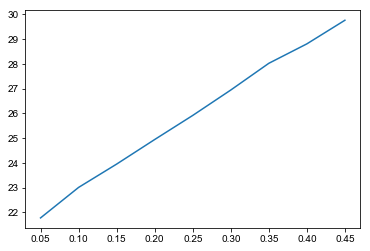

In [8]:
plt.plot(rs, call_price_list)

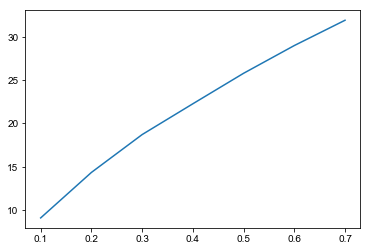

In [9]:
Ts = np.arange(0.1, 0.8, 0.1)
call_price_list = []
for T1 in Ts:
    call_price_list.append(monte_call_price(S0,X,r,sigma,T1,n_simulation,steps))
plt.plot(Ts, call_price_list)

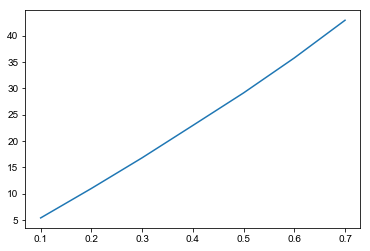

In [10]:
sigmas = np.arange(0.1, 0.8, 0.1)
call_price_list = []
for sigma1 in sigmas:
    call_price_list.append(monte_call_price(S0,X,r,sigma1,T,n_simulation,steps))
plt.plot(Ts, call_price_list)

# 第八章 Python投资组合策略

In [11]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
# 支持中文显示
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_column', 8 )

## 马科维兹投资组合理论
马科维兹根据每一种证券的预期收益率、方差、和所有证券之间的协方差，得到了证券组合 的有效边界，在根据投资者的效用无差异曲线，确定最佳投资组合。

模型理论：

$$ min\ \sigma_p^2=X^T\sum X \\ max\ E(r_p)=X^TR \\ s.t.\ \sum_{i=1}^nx_i=1$$

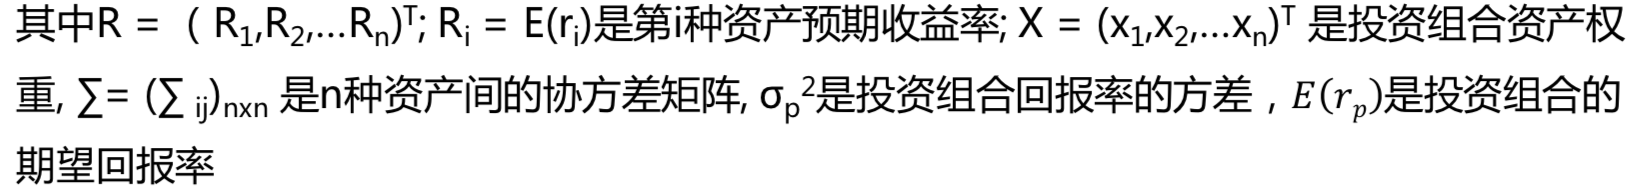

以上就是马科维茨均值-方差模型,即风险一定,收益最大,收益一定，风险最小
### 简单案例

现在有三只股票，华北制药，中国石化和上海机场，三只股票收益率、方差和协方差分别如 下:

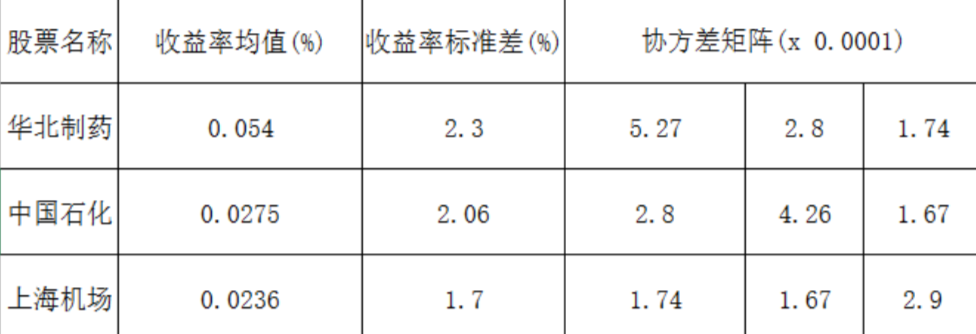

根据上述公式计算投资组合收益率

In [12]:
# # # # # # 简单案例
returns = np.array([0.000540, 0.000275, 0.000236]).reshape(-1,1) #收益率(列向量)
covariance = 0.0001* np.array([[5.27, 2.80, 1.74],
                       [2.80, 4.26, 1.67],
                       [1.74, 1.67, 2.90]]) #协方差矩阵
weights = 1.0/3 * np.array([1,1,1]).reshape(-1,1) #权重矩阵(列向量)
port_expected_return = np.dot(weights.T,returns)[0] #这里是投资组合收益情况
#这里是投资组合风险情况
port_expected_risk  = np.dot(np.dot(weights.T,covariance),weights)[0] #方差
port_expected_std = port_expected_risk[0] ** 0.5 #标准差
print('投资组合收益和标准差分别为: %6e, %.4f' %(port_expected_return ,port_expected_std ) )

投资组合收益和标准差分别为: 3.503333e-04, 0.0166


### python案例实践: 基于股票的历史收益来进行投资组合优化

In [13]:
# 产生三个数据，基于模拟法，模拟三只股票的收益率数据
stock1 = npr.normal(0.000525,0.03,100)# 第一只股票收益率
stock2 = npr.normal(-0.00044,0.03,100)# 第二只股票收益率
stock3= npr.normal(0.004,0.03,100) # 第三只股票收益率
stock_data = pd.DataFrame({'stock1': stock1,'stock2':stock2,'stock3':stock3})
selected = ['stock1','stock2','stock3']

In [14]:
stock_data.head()

,stock1,stock2,stock3
0,-0.068209,0.016619,-0.034570
1,-0.003424,0.018950,-0.012063
2,0.018972,-0.040608,0.011524
3,0.017182,-0.007260,-0.065408
4,-0.008992,0.001165,0.031608


In [15]:
# 用蒙特卡洛法产生大量的模拟
port_returns = [] #投资组合收益率
port_volatility = [] #波动
stock_weights = [] #权重
num_assets = 3 #资产数量
num_portfolios = 10000  #产生10000次随机模拟
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) #随机产生一次
    weights /= np.sum(weights) #计算权重
    returns = np.dot(weights, stock_data.mean()) #期望收益
    volatility = np.sqrt(np.dot(np.dot(weights,stock_data.cov()),weights.reshape(-1,1))[0])#波动
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
#创建一个字典，存储相关数据
portfolio = {'Returns': port_returns, 'Volatility': port_volatility}

In [16]:
# and weight in the portfolio 投资组合权重
for counter,symbol in enumerate(selected):
    portfolio[symbol+'_weight'] = [weight[counter] for weight in stock_weights]
df = pd.DataFrame(portfolio) #转换为dataframe

column_order = ['Returns', 'Volatility'] + [stock+'_weight' for stock in selected]
df = df[column_order]
df.head()

,Returns,Volatility,stock1_weight,stock2_weight,stock3_weight
0,0.000885,0.020183,0.661011,0.190272,0.148717
1,0.000109,0.020084,0.010640,0.578046,0.411313
2,0.001619,0.018354,0.217864,0.231433,0.550702
3,-0.000489,0.020743,0.072515,0.659903,0.267582
4,0.000616,0.016378,0.352339,0.356821,0.290841


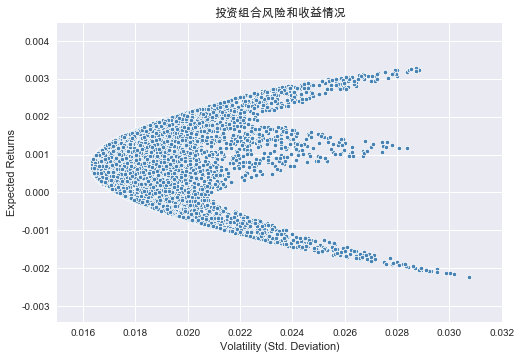

In [18]:
# 绘制图形
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.scatterplot(x = 'Volatility',y = 'Returns',data = df,color="steelblue", marker='o', s=20)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('投资组合风险和收益情况')
plt.show()

In [19]:
# 计算夏普比最大的投资组合
# 计算夏普比
# 假设无风险收益率每天为0.04/252
df['sharp_ratio'] = (df['Returns'] - 0.04/252)/df['Volatility']
sharp_ratio = df.loc[df['sharp_ratio']==df['sharp_ratio'].max(),:]#计算夏普比例最大对应的值
min_vari = df.loc[df['Volatility']==df['Volatility'].min(),:]#计算方差最小对应的值

In [20]:
# 使用函数求解
# port_returns = np.array(port_returns)
# port_variance = np.array(port_returns)
num =  3 #投资组合资产个数
returns = stock_data #股票投资回报率
# 定义函数，返回投资组合预期收益,标准差和夏普比例
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.dot(weights.reshape(1,-1),returns.mean())
    port_variance = np.sqrt(np.dot(np.dot(weights, returns.cov()), weights.reshape(-1, 1)))
    return np.array([port_returns, port_variance, (port_returns - 0.04/252)/port_variance])

In [21]:
#最优化投资组合的推导是一个约束最优化问题
import scipy.optimize as sco
#最小化夏普指数的负值
def min_sharpe(weights):
    return -statistics(weights)[2]
# 约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下
cons=({'type':'eq', 'fun':lambda x: np.sum(x)-1})
#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数
bnds = tuple((0,1) for x in range(num))
#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。
opts = sco.minimize(min_sharpe, num*[1./num,], method = 'SLSQP', bounds = bnds, constraints = cons)
opts #结算结果
opts['x'].round(3) #权重
statistics(opts['x']) # 得到投资组合，分别为收益率，方差和夏普比例

array([[0.0029367 ],
       [0.02483506],
       [0.11185672]])

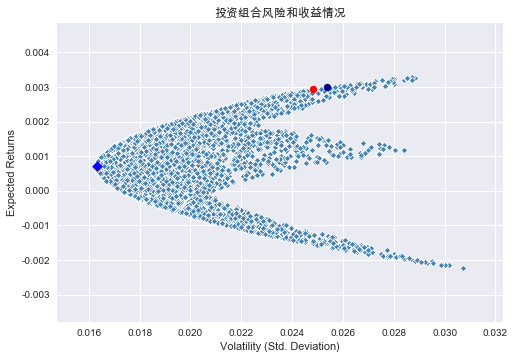

In [22]:
# # # # # # 方差最小
def min_variance(weights):
    return statistics(weights)[1]
optv = sco.minimize(min_variance, num*[1.0/num,], method='SLSQP',bounds=bnds,
                    constraints=cons)
optv['x'] #权重
# 得到方差最小的投资组合
statistics(optv['x'])  # 得到投资组合，分别为收益率，方差和夏普比例
# 绘制波动最小和夏普比例最高在图形上
sharpe_portfolio =  statistics(opts['x'])  #计算夏普比例最大对应的值
min_variance_port = statistics(optv['x']) ##计算方差最小对应的值
sns.scatterplot(x = 'Volatility',y = 'Returns',color='steelblue',data = df,
          marker='D', s=20)
plt.scatter(x=sharp_ratio.Volatility, y=sharp_ratio.Returns, c='darkblue', marker='o', s=50) #模拟结果
plt.scatter(x=min_vari.Volatility, y=min_vari.Returns, c='orange', marker='D', s=50 )#模拟结果
plt.scatter(x=sharpe_portfolio[1], y=sharpe_portfolio[0], c='red', marker='o', s=50)#数值计算结果
plt.scatter(x=min_variance_port[1], y=min_variance_port[0], c='blue', marker='D', s=50 )#数值计算结果
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('投资组合风险和收益情况')
plt.show()

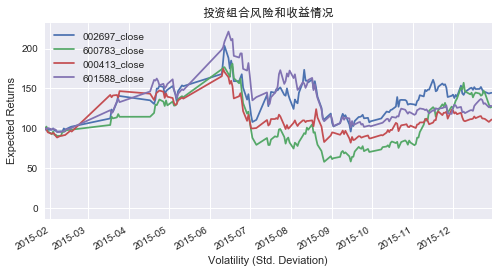

In [24]:
# # # # # # # 投资组合实际案例运用
# 通过真实股票数据案例
import tushare as ts
# 股票池
symbol = ['002697','600783','000413','601588']
# 002697 红旗连锁, 600783 鲁信创投, 000413 东旭光电, 601588 北辰实业
data = ts.get_k_data('hs300',start='2015-01-01',end='2015-12-31')
data = data[['date','close']]
data.rename(columns={'close': 'hs300'},inplace=True)
# 分别为沪深300,北京银行，航天动力和上海能源
# data = pd.DataFrame()
for i in symbol:
    get_data = ts.get_k_data(i,start='2015-01-01',end='2015-12-31')
    get_data = get_data[['date','close']]
    get_data.rename(columns={'close': i + '_close'},inplace=True)
    data = pd.merge(data,get_data,left_on='date',right_on='date',how='left')
data.index = data['date']
del data['date']
del data['hs300']
data = data.dropna() #删除缺失值
data.index = pd.to_datetime(data.index)
(data/data.iloc[0]*100).plot(figsize=(8,4)) #量纲级处理

# 计算收益率
returns = np.log(data/data.shift(1))
returns = returns.dropna()
# 给不同资产分配权重
# 用蒙特卡洛法产生大量的模拟
port_returns = [] #投资组合收益率
port_volatility = [] #波动
stock_weights = []#权重
num_assets =4 #资产数量
num_portfolios = 10000 #产生10000次随机模拟

for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_returns.append(np.dot(weights, returns.mean()*252))#期望收益
    volatility = np.sqrt(np.dot(np.dot(weights,returns.cov()*252),weights.reshape(-1,1))[0])#波动
    port_volatility.append(volatility)
    stock_weights.append(weights)

portfolio = {'Returns': port_returns, 'Volatility': port_volatility} #创建一个字典
# and weight in the portfolio 投资组合权重
for counter,stock in enumerate(symbol):
    portfolio[stock +'_weight'] = [weight[counter] for weight in stock_weights]
df = pd.DataFrame(portfolio)
#按顺序取数
column_order = ['Returns', 'Volatility'] + [stock+'_weight' for stock in symbol]
df = df[column_order]
df.head()
# 绘制图形
sns.scatterplot(x = 'Volatility',y = 'Returns',data = df,color="steelblue", marker='o', s=20)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('投资组合风险和收益情况')
plt.show()

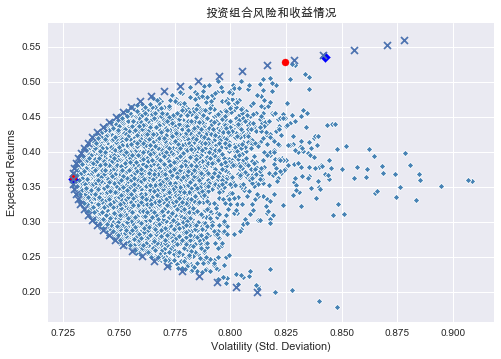

In [25]:
# 计算夏普比最大的投资组合
# 计算夏普比
# 假设无风险收益率每天为0.04
df['sharp_ratio'] = (df['Returns'] - 0.04)/df['Volatility']
sharp_ratio = df.loc[df['sharp_ratio']==df['sharp_ratio'].max(),:]#计算夏普比例最大对应的值
min_vari = df.loc[df['Volatility']==df['Volatility'].min(),:]#计算方差最小对应的值
# 使用函数求解
num = 4 #投资组合资产个数
# 定义函数，返回投资组合预期收益,标准差和夏普比例
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.dot(weights.reshape(1,-1),returns.mean()*252)
    port_variance = np.sqrt(np.dot(np.dot(weights, returns.cov()*252), weights.reshape(-1, 1)))
    return np.array([port_returns, port_variance, (port_returns - 0.04)/port_variance])

#最优化投资组合的推导是一个约束最优化问题
import scipy.optimize as sco
#最小化夏普指数的负值
def min_sharpe(weights):
    return -statistics(weights)[2]
# 约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下
cons=({'type':'eq', 'fun':lambda x: np.sum(x)-1})
#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数
bnds = tuple((0,1) for x in range(num))
#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。
opts = sco.minimize(min_sharpe, num*[1./num,], method = 'SLSQP', bounds = bnds, constraints = cons)
opts #结算结果
opts['x'].round(3) #权重
statistics(opts['x']) # 得到投资组合，分别为收益率，方差和夏普比例

# # # # # # 方差最小
def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, num*[1.0/num,], method='SLSQP',bounds=bnds,
                    constraints=cons)
optv['x'] #权重
# 得到方差最小的投资组合
statistics(optv['x'])  # 得到投资组合，分别为收益率，方差和夏普比例

# # # 投资组合有效边界
def min_variance(weights):
    return statistics(weights)[1]

#在不同目标收益率水平（target_returns）循环时，最小化的一个约束条件会变化。
target_returns = np.linspace(0.2,0.56,50)
target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, num*[1./num,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])
target_variance = np.array(target_variance)

# 绘制波动最小和夏普比例最高在图形上
sharpe_portfolio =  statistics(opts['x'])  #计算夏普比例最大对应的值
min_variance_port = statistics(optv['x']) ##计算方差最大对应的值
sns.scatterplot(x = 'Volatility',y = 'Returns',color='steelblue',data = df,
          marker='D', s= 20)
plt.scatter(x= sharpe_portfolio[1], y=sharpe_portfolio[0], c='red', marker='o', s=50)
plt.scatter(x= min_variance_port[1], y=min_variance_port[0], c='blue', marker='D', s=50 )
plt.scatter(x=min_vari.Volatility, y=min_vari.Returns, c='red', marker='o', s=50)
plt.scatter(x=sharp_ratio.Volatility, y=sharp_ratio.Returns, c='blue', marker='D', s=50 )
# 有效边界
#叉号：有效前沿
plt.scatter(target_variance,target_returns, marker = 'x')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('投资组合风险和收益情况')
plt.show()

## hw08

### Q1.
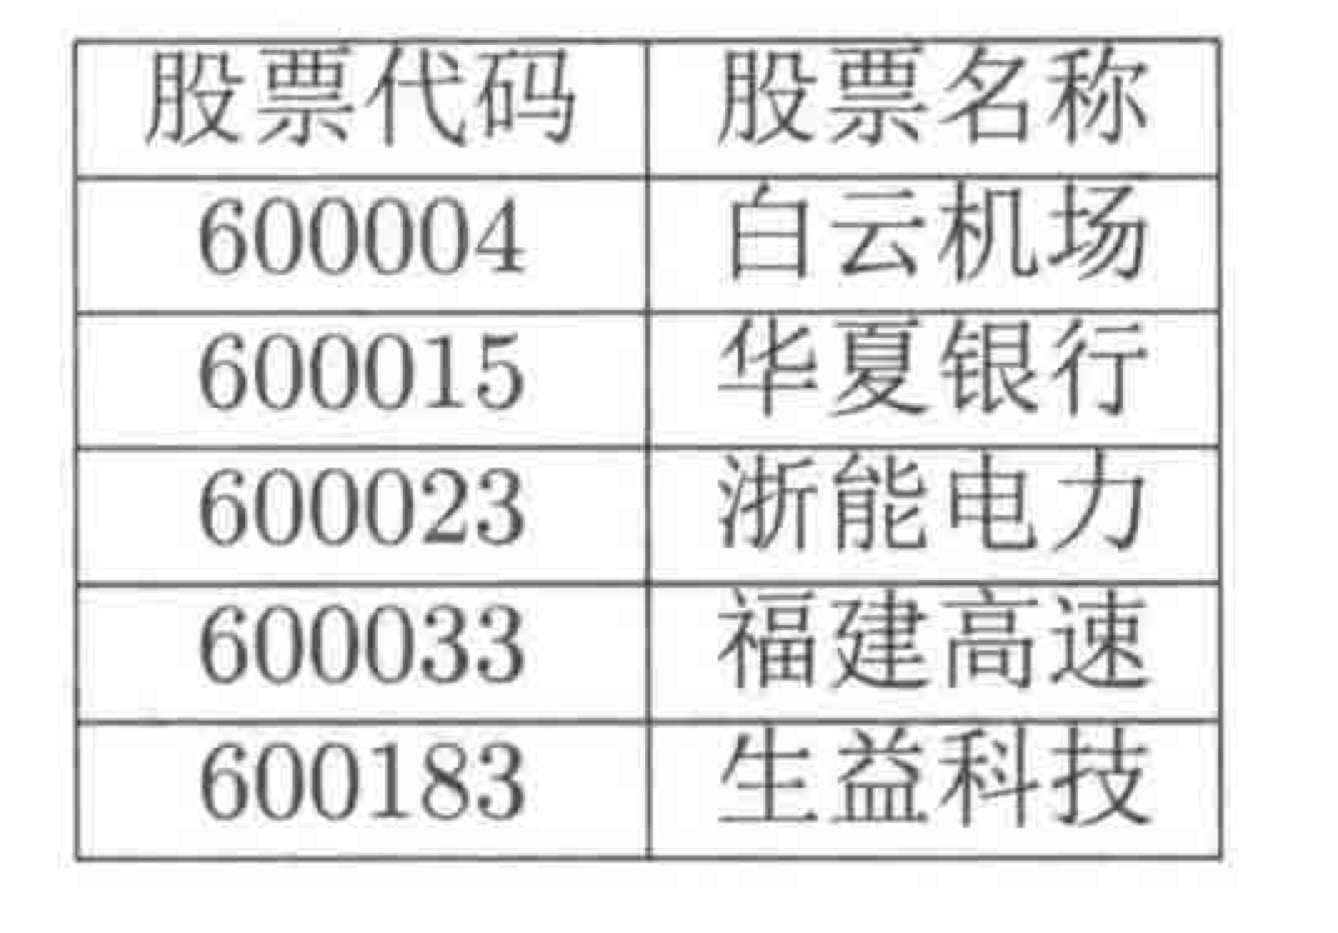

（1）按照投资组合策略，用2016年的股票收盘价，使用蒙特卡洛模拟，绘制投资收益与波动率关系图，并且在最大夏普比和最小方差的情况下，分别计算各项资产权重。

(2)  绘制有效前沿图

In [27]:
import tushare as ts
# 股票池
symbol = ['600004','600015','600023','600033', '600183']
# 002697 红旗连锁, 600783 鲁信创投, 000413 东旭光电, 601588 北辰实业
data = ts.get_k_data('hs300',start='2016-01-01',end='2016-12-31')
data = data[['date','close']]
data.rename(columns={'close': 'hs300'},inplace=True)
# 分别为沪深300,北京银行，航天动力和上海能源
# data = pd.DataFrame()
for i in symbol:
    get_data = ts.get_k_data(i,start='2016-01-01',end='2016-12-31')
    get_data = get_data[['date','close']]
    get_data.rename(columns={'close': i + '_close'},inplace=True)
    data = pd.merge(data,get_data,left_on='date',right_on='date',how='left')
data.index = data['date']
del data['date']
del data['hs300']
data = data.dropna() #删除缺失值
data.index = pd.to_datetime(data.index)
data.head()

,600004_close,600015_close,600023_close,600033_close,600183_close
date,,,,,
2016-01-04,8.620,8.882,6.059,3.494,5.591
2016-01-05,8.536,8.905,6.138,3.557,5.396
2016-01-06,8.724,8.921,6.271,3.683,5.528
2016-01-07,8.068,8.316,5.732,3.377,4.976
2016-01-08,8.250,8.394,5.856,3.530,5.001


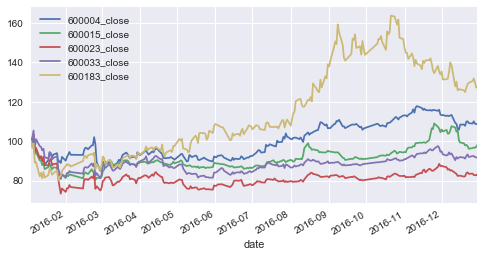

In [28]:
(data/data.iloc[0]*100).plot(figsize=(8,4)) #量纲级处理

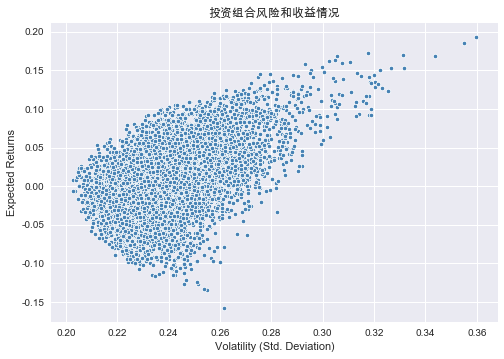

In [30]:

# 计算收益率
returns = np.log(data/data.shift(1))
returns = returns.dropna()
# 给不同资产分配权重
# 用蒙特卡洛法产生大量的模拟
port_returns = [] #投资组合收益率
port_volatility = [] #波动
stock_weights = []#权重
num_assets =5 #资产数量
num_portfolios = 10000 #产生10000次随机模拟

for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_returns.append(np.dot(weights, returns.mean()*252))#期望收益
    volatility = np.sqrt(np.dot(np.dot(weights,returns.cov()*252),weights.reshape(-1,1))[0])#波动
    port_volatility.append(volatility)
    stock_weights.append(weights)

portfolio = {'Returns': port_returns, 'Volatility': port_volatility} #创建一个字典
# and weight in the portfolio 投资组合权重
for counter,stock in enumerate(symbol):
    portfolio[stock +'_weight'] = [weight[counter] for weight in stock_weights]
df = pd.DataFrame(portfolio)
#按顺序取数
column_order = ['Returns', 'Volatility'] + [stock+'_weight' for stock in symbol]
df = df[column_order]
df.head()
# 绘制图形
sns.scatterplot(x = 'Volatility',y = 'Returns',data = df,color="steelblue", marker='o', s=20)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('投资组合风险和收益情况')
plt.show()

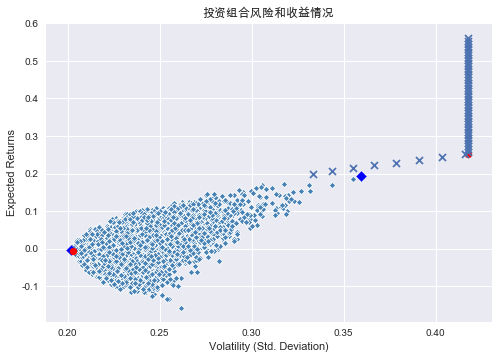

In [32]:
# 计算夏普比最大的投资组合
# 计算夏普比
# 假设无风险收益率每天为0.04
df['sharp_ratio'] = (df['Returns'] - 0.04)/df['Volatility']
sharp_ratio = df.loc[df['sharp_ratio']==df['sharp_ratio'].max(),:]#计算夏普比例最大对应的值
min_vari = df.loc[df['Volatility']==df['Volatility'].min(),:]#计算方差最小对应的值
# 使用函数求解
num = 5 #投资组合资产个数
# 定义函数，返回投资组合预期收益,标准差和夏普比例
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.dot(weights.reshape(1,-1),returns.mean()*252)
    port_variance = np.sqrt(np.dot(np.dot(weights, returns.cov()*252), weights.reshape(-1, 1)))
    return np.array([port_returns, port_variance, (port_returns - 0.04)/port_variance])

#最优化投资组合的推导是一个约束最优化问题
import scipy.optimize as sco
#最小化夏普指数的负值
def min_sharpe(weights):
    return -statistics(weights)[2]
# 约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下
cons=({'type':'eq', 'fun':lambda x: np.sum(x)-1})
#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数
bnds = tuple((0,1) for x in range(num))
#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。
opts = sco.minimize(min_sharpe, num*[1./num,], method = 'SLSQP', bounds = bnds, constraints = cons)
opts #结算结果
opts['x'].round(3) #权重
statistics(opts['x']) # 得到投资组合，分别为收益率，方差和夏普比例

# # # # # # 方差最小
def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, num*[1.0/num,], method='SLSQP',bounds=bnds,
                    constraints=cons)
optv['x'] #权重
# 得到方差最小的投资组合
statistics(optv['x'])  # 得到投资组合，分别为收益率，方差和夏普比例

# # # 投资组合有效边界
def min_variance(weights):
    return statistics(weights)[1]

#在不同目标收益率水平（target_returns）循环时，最小化的一个约束条件会变化。
target_returns = np.linspace(0.2,0.56,50)
target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, num*[1./num,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])
target_variance = np.array(target_variance)

# 绘制波动最小和夏普比例最高在图形上
sharpe_portfolio =  statistics(opts['x'])  #计算夏普比例最大对应的值
min_variance_port = statistics(optv['x']) ##计算方差最大对应的值
sns.scatterplot(x = 'Volatility',y = 'Returns',color='steelblue',data = df,
          marker='D', s= 20)
plt.scatter(x= sharpe_portfolio[1], y=sharpe_portfolio[0], c='red', marker='o', s=50)
plt.scatter(x= min_variance_port[1], y=min_variance_port[0], c='blue', marker='D', s=50 )
plt.scatter(x=min_vari.Volatility, y=min_vari.Returns, c='red', marker='o', s=50)
plt.scatter(x=sharp_ratio.Volatility, y=sharp_ratio.Returns, c='blue', marker='D', s=50 )
# 有效边界
#叉号：有效前沿
plt.scatter(target_variance,target_returns, marker = 'x')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('投资组合风险和收益情况')
plt.show()

### Q2  假设现在有一个投资组合，由股票A和股票B构成，绘制不同的相关系数下，投资组合方差的变化情况 
假设股票A收益率为15%，股票B收益率为12%，投资股票A的权重为80%，股票B的权重为20%。

$$ \sigma_p^2=w_A^2\sigma_A^2+w_B^2\sigma_B^2+2w_Aw_B\rho_{AB}\sigma_A\sigma_B $$

假设sigmaA=0.3, sigmaB=0.5

In [33]:
def sigma2(wa, wb, sigmaA, sigmaB, rou):
    return wa**2 * sigmaA**2 + wb**2 * sigmaB**2 + 2*wa*wb*rou*sigmaA*sigmaB

In [34]:
import numpy as np

In [37]:
rou = np.arange(-1, 1, 0.01)
sigmaA=0.3
sigmaB=0.5

In [36]:
import matplotlib.pyplot as plt

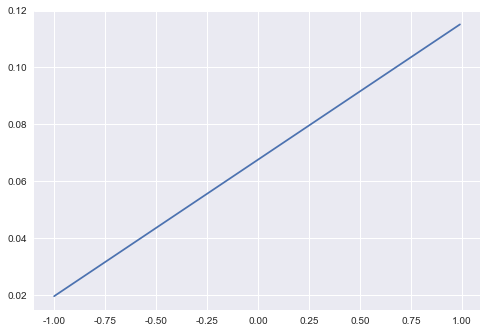

In [38]:
plt.plot(rou, sigma2(0.8, 0.2, sigmaA, sigmaB, rou))